## Downloading a polygon for another location and getting its NDVI data

### Step 1: Set up
Load libraries

In [1]:
### vector data
import geopandas as gpd
import pandas as pd

### raster data
import rioxarray as rxr
import xarray as xr

### maps and plots
import holoviews as hv
import hvplot.pandas
import hvplot.xarray

### open street map
from osmnx import features as osm
import osmnx as ox

### file structure
import os
import pathlib

### earthpy
import earthpy
import earthpy.api.appeears as eaapp

In [2]:
### set up project and folder for data
project = earthpy.Project("Gila River Vegetation", dirname = 'san_ildefonso_ndvi')


## Step 2: Get polygon for area of interest
Go to [Open Street Maps](https://www.openstreetmap.org/#map=4/38.01/-95.84) and search for your area of interest to see how it's labeled.

Example: Point Reyes National Seashore (not stored as an address in OSM)


In [3]:
### search for PRNS
sip_gdf = ox.geocode_to_gdf(
    'San Ildefonso Pueblo')

### check it out
sip_gdf

,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((-106.27703 35.85521, -106.27559 35.8...",-106.277028,35.826332,-106.062454,35.930908,305673388,relation,9436262,35.880326,-106.14354,boundary,aboriginal_lands,25,0.418305,aboriginal_lands,San Ildefonso Pueblo,"San Ildefonso Pueblo, Santa Fe County, New Mex..."


<Axes: >

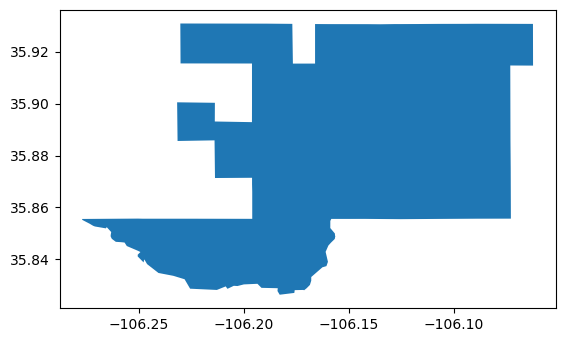

In [4]:
### make a quick plot
sip_gdf.plot()

## Step 3: Get NDVI for area of interest

First, you'll need to make a free account at [NASA EarthData](https://urs.earthdata.nasa.gov/). When you run the download_files() command, you will see a prompt at the top of your notebook asking you for your NASA EarthData username (not the email address you used for your account!) and password.
    



In [5]:
### initialize AppeearsDownloader for MODIS NDVI data
### set parameters
ndvi_downloader = eaapp.AppeearsDownloader(

    ### give your download a name
    download_key = "san_ildefonso_ndvi",

    ### tell it to put the data in your project that you already defined
    project = project,

    ### specify the MODIS product you want
    product = 'MOD13Q1.061',
    layer = '_250m_16_days_NDVI',

    ### choose a start date and end data
    start_date = "06-01",
    end_date = "07-30",

    ### recurring means you want those dates over multiple years
    recurring = True,

    ### specify the range of years you want
    year_range = [2017, 2023],

    ### specify the polygon you want to get NDVI data for
    polygon = sip_gdf
)

In [6]:
ndvi_downloader

In [7]:
### download the prepared download -- this can take a while!
ndvi_downloader.download_files(cache=True)

No stored credentials found for urs.earthdata.nasa.gov. Please log in.


/opt/conda/lib/python3.11/site-packages/earthpy/api/auth.py:192: UserWarning: Setting credentials not supported for 'netrc' backend.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/earthpy/api/auth.py:196: UserWarning: Failed to store credentials with 'keyring': No recommended backend was available. Install a recommended 3rd party backend package; or, install the keyrings.alt package if you want to use the non-recommended backends. See https://pypi.org/project/keyring for details.
  warnings.warn(


Credentials stored using 'env' backend.


In [8]:
### get a sorted list of NDVI file paths
ndvi_paths = sorted(list(project.project_dir.rglob('*NDVI*.tif')))

ndvi_paths

[PosixPath('/workspaces/data/san_ildefonso_ndvi/san_ildefonso_ndvi/MOD13Q1.061_2017137_to_2023211/MOD13Q1.061__250m_16_days_NDVI_doy2017145000000_aid0001.tif'),
 PosixPath('/workspaces/data/san_ildefonso_ndvi/san_ildefonso_ndvi/MOD13Q1.061_2017137_to_2023211/MOD13Q1.061__250m_16_days_NDVI_doy2017161000000_aid0001.tif'),
 PosixPath('/workspaces/data/san_ildefonso_ndvi/san_ildefonso_ndvi/MOD13Q1.061_2017137_to_2023211/MOD13Q1.061__250m_16_days_NDVI_doy2017177000000_aid0001.tif'),
 PosixPath('/workspaces/data/san_ildefonso_ndvi/san_ildefonso_ndvi/MOD13Q1.061_2017137_to_2023211/MOD13Q1.061__250m_16_days_NDVI_doy2017193000000_aid0001.tif'),
 PosixPath('/workspaces/data/san_ildefonso_ndvi/san_ildefonso_ndvi/MOD13Q1.061_2017137_to_2023211/MOD13Q1.061__250m_16_days_NDVI_doy2017209000000_aid0001.tif'),
 PosixPath('/workspaces/data/san_ildefonso_ndvi/san_ildefonso_ndvi/MOD13Q1.061_2017137_to_2023211/MOD13Q1.061__250m_16_days_NDVI_doy2018145000000_aid0001.tif'),
 PosixPath('/workspaces/data/san_i

Continue through the process using the code from the NDVI water rights assignment!